<a href="https://colab.research.google.com/github/paulorayner/repositorio_dsnp/blob/master/An%C3%A1lise_de_doen%C3%A7as_cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise exploratória de dados de doenças cardiovasculares**
De acordo com a [Diretriz de Prevenção Cardiovascular da Sociedade Brasileira de Cardiologia - 2019](http://publicacoes.cardiol.br/2014/diretrizes/2019/atualizacao-da-diretriz-de-prevencao-cardiovascular-da-sociedade-brasileira-de-cardiologia-2019.asp), a principal causa de morte no Brasil e no mundo são as doenças cardiovasculares. A presença de diversos fatores de risco como obesidade, diabetes, hipertensão, fatores genéticos e comportamentais como má alimentação, tabagismo e sedentarismo podem contribuir para o acomentimento de doenças cardiovasculares. 

O desenvolvimento de tecnologias e métodos avançados de diagnósticos tem sido extensivamente explorados. Por exemplo, a aplicação de modelos de inteligência artificial para aumentar o sucesso no diagnóstico com uso de exames minimamente invasivos como análise de glicemia, colesterol, angiogramas, eletrocardiogramas, entre outros. 

Desas forma, este notebook tem como objetivo explorar as condições de saúde de pacientes submetidos a exames para teste clínico, para aplicação de um algoritmo de inteligência artificial.

**Atenção! Este projeto não tem como objetivo fornecer diagnósticos e tampouco deverá ser utilizado para este fim.**

## Obtenção dos Dados

Os dados utilizados na execução deste projeto foram obitidos a partir do [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease) da ***Cleveland Clinic Foundation***, provenientes do trabalho publicado por [Detrano e colaboradores (1989)](https://www.sciencedirect.com/science/article/abs/pii/0002914989905249) na revista **The American Journal of Cardiology**. Neste trabalho os autores tinham como objetivo avaliar a acurácia de um algoritmo que utiliza um conjunto de dados relativamente pequeno, seria capaz de prediser de forma precisa a probabilidade de Doença Arterial Coronriana (DAC). 

###Características do *dataset*
Por questões de sigilo foram removidos qualquer informação que pudesse levar a identidade dos pacientes.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - glicemia em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso - (indica cardiopatia isquêmica.)
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

## Importação das bibliotecas
Para que seja possível executar as tarefas, é preciso fazer a importação das bibliotecas para o seu ambiente. As bibliotecas possuem conjuntos de ferramentas que possibilitam a execução das tarefas (leitura de arquivos, construção de gráficos, etc). 
Neste momento serão importadas duas bibliotecas 
* pandas (permite a contrução do *dataframe*
* matplotlib.pyplot (construção dos gráficos)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Importação dos dados e contrução do **dataframe**.
os dados serão importados conforme informadas na introdução do projeto.

* O dataframe contendo os dados da UCI receberá o nome de **df_uci**.
* O dataframe contendo os dados do Brasil receberá o nome de **df_br**.

In [0]:
#url dos conjuntos de dados 

data_set_uci = 'https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv'
data_set_br = 'https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv'

#Criação dos dataframes 

df_uci = pd.read_csv(data_set_uci) #dataframe com dados da UCI

df_br = pd.read_csv(data_set_br, index_col='ano') #dataframe com dados do Brasil

### Verificando a criação do dataframe
Para verificar se os dados foram importados corretamente e o dataframe foi deviadamente construído. Vamos utilizar a função `head()`. Por padrão a esta função retorna as 5 primeiras linhas do dataframe. Caso seja de interesse do usuário visualizar mais linhas ou menos linhas, basta inserir o número entre os parênteses. Por exemplo, para retornar as 15 primeiras linhas basta executar `nome_do_data_frame.head(15)`.

In [50]:
# Verificando a importação dos dados e construção do dataframe da UCI. Serão visualizadas as 10 primeiras linhas.
df_uci.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


##Obervação
Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].
Sendo 0 para ausência e 1, 2, 3 e 4 para presença de doenças cardíaca.

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [51]:
# variável alvo antes
df_uci.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Primeiramente serão selecionados todos os valores da coluna 'num' diferentes de 0. Então, para estes valores será atribuído o novo valor 1. Para isso será utilizado `loc[]`. 

In [0]:
# converter valores >= 1 em 1. Utilizando a loc[] é possível selecionar determinada coluna e fazer a modificação dos dados 
df_uci.loc[df_uci.num != 0, 'num'] = 1

In [53]:
# variável alvo depois
df_uci.num.value_counts()

0    164
1    139
Name: num, dtype: int64

Note que a quantidade de pacientes que não apresentava doença cardíaca continua '0' sendo 164. Já a quantidade de pacientes com doenças cardíacas '1' é a soma dos pacientes classidicados de 1 a 4. 


In [54]:
#Verificando a importação do conjunto de dados e contrução do dataframe df_br
df_br.head(10)

,mortes_doencas_cardio
ano,
2017,383.961
2016,362.091
2015,349.584
2014,340.284
2013,339.672
2012,333.295
2011,335.213
2010,326.371
2009,320.074


##Características dos dataframes
É extremamente importante entender as características dos dataframes como tamanho (número de entradas e variáveis), classificação das variáveis (texto ou números), dados estatísticos.

###Tamanho dos dataframes 
Um dataframe é composto por linhas e colunas. O parâmetro `shape[]`retorna a contagem do número de linhas e colunas. Para identicar os valores, shape utiliza os índices 0 e 1. O índice 0 representa o número de linhas, o índice 1 representa o número de colunas. Dessa forma, para encontrar o número de linhas (entradas) utiliza-se `nome_do_dataframe.shape[0]`, para o número de colunas (variáveis) `nome_do_dataframe.shape[1]`.

In [55]:
#Tamanho do dataframe df_uci. A função print() imprime/retorna tudo que está dentro dos parênteses.
print('O dataframe df_uci possui',(df_uci.shape[0]), 'entradas (linhas) e ', (df_uci.shape[1]), 'variáveis (colunas)')

O dataframe df_uci possui 303 entradas (linhas) e  14 variáveis (colunas)


In [56]:
#Tamando do dataframe df_br
print('O dataframe df_br possui',(df_br.shape[0]), 'entradas (linhas) e ', (df_br.shape[1]), 'variável (coluna)')

O dataframe df_br possui 14 entradas (linhas) e  1 variável (coluna)


### Classificação das variáveis
Uma coluna pode conter números ou texto. Textos são identificados como `str`, números são identificados como `int`(números sem casas decimais) ou `float`(números com casas decimais). Para determinar como estão classificados os dados do dataframe será utilizado a função `display()` juntamente com o comando `dtypes` (`nome_do_dataframe.dtypes`) que retorna o tipo de dados. 

**Obs.:** A função `display` é semelhando à função `print (que também poderia ser utilizada para esse fim).

In [57]:
#Classificação dos dados df_uci
display(df_uci.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

### Resultado
Veja que df_uci é composto apenas por números, sendo a maioria, números com casas decimais `float`e apenas uma variável com números inteiros `int`. 

In [58]:
#Classificação dos dados df_br
display(df_br.dtypes)

mortes_doencas_cardio    float64
dtype: object

### Resultado
O dataframe df_br é extremamente simples com apenas duas colunas. A coluna `ano` está classificada como número inteiro `int` e a coluna `mortes_doencas_cardio` como número com casas decimais `float`.

A tabela abaixo mostra que os números estão com separador de milhares. Observa a primeira entrada **2017** =  **383.961**. Como a linguagem segue a configuração da língua inglesa o ponto (**.**) está sendo interpretado como uma separador de casa decimal ao invés de separador de milhar.
Existem várias maneiras de manipular estes valores. Aqui será realizado um procedimento simples realizando os seguintes passos:

* Primeiro vamos multiplicar por 1000 para que os valores chegem na escala correta. 
* Segundo passo é transformar esses números decimais (`float`) em números inteiros (`int`) como de fato são. Para isso será utilizado a função `astype()`.

In [59]:
#Visualizando as 10 primeiras entradas
df_br.head(10)

,mortes_doencas_cardio
ano,
2017,383.961
2016,362.091
2015,349.584
2014,340.284
2013,339.672
2012,333.295
2011,335.213
2010,326.371
2009,320.074


######Note que os 


In [0]:
#Criando uma cópia do dataframe. Como medida de segurança, sempre manipular cópia dos dados
df_brcopy = df_br.copy()

In [0]:
#Multiplicando os valores por mil
df_brcopy['mortes_doencas_cardio'] = df_brcopy['mortes_doencas_cardio'] *1000

In [62]:
#Verificando o resultado
df_brcopy.head(15)

,mortes_doencas_cardio
ano,
2017,383961.0
2016,362091.0
2015,349584.0
2014,340284.0
2013,339672.0
2012,333295.0
2011,335213.0
2010,326371.0
2009,320074.0


In [0]:
#Transformando números decimais em números inteiros 
df_brcopy['mortes_doencas_cardio'] = df_brcopy['mortes_doencas_cardio'].astype(int)

Os dados estão ordenado de forma descrescente, mas vamos ordenar de forma ascendente. Para isso vamos executar passar a função para `sort_index`. Ele organiza pelo índice, ou seja, a coluna ano. 

In [0]:
#Ordenando pelo ando em ordem crescente 
df_brcopy.sort_index(ascending=True, inplace=True)

In [65]:
#Verificando os resultados
df_brcopy.head(15)

,mortes_doencas_cardio
ano,
2004,285543
2005,283927
2006,302817
2007,308466
2008,317797
2009,320074
2010,326371
2011,335213
2012,333295


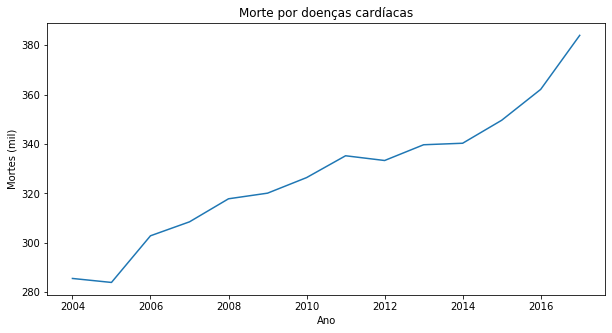

In [101]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.lineplot(x=df_br.index, y="mortes_doencas_cardio", data=df_br)
ax.set_title('Morte por doenças cardíacas')
ax.set_ylabel('Mortes (mil)')
ax.set_xlabel('Ano');

###Resultado
Analisando os dados sobre o número de mortes causados por doenças cardiovasculares. Observa-se um nítido aumento no número de óbitos. Esse aumento pode ter relação tanto com o crescimento populacional, quanto com uma maior ocorrência das doenças cardiovasculares. O que ressalta a importância da análise de dados como ferramenta no processo de tomada de decisão.

# **Análise dos dados do teste Clínico**
##Tabela estatística
Para começar a entender os dados é importante construir a tabela estatística. A função `describe()` retorna os dadaos estatísticos que serão importantes durante a análise. 

Vale a pena ressaltar que a função `describe()` retorna a estatística de **todas** as variáveis numéricas. Como visto acima, o df_uci possui todas as variáveis classificadas como numéricas (`int` e `float`). Entretanto, alguns valores foram atribuídos para classificação. Por exemplo, coluna `sex`, que tem **0** para feminino e **1** para masculino. A análise estatística como determinação da média, mediana e desvio padrão desse tipo de variável não traz informações tão relevantes.

Assim, para analisar apenas as colunas com dados não classificatórios serão selecionados apenas as variáveis de interesse.



##Análise
Primeiramente será analisado a idade dos pacientes. Para isso vamos criar a tabela estatística para analisar as características dessa variável. Em seguida será construído um histograma para entender a distribuição dos dados.

In [66]:
#Construção da tabela estatística da variável idade.
df_uci[['age']].describe()

,age
count,303.000000
mean,54.438944
std,9.038662
min,29.000000
25%,48.000000
50%,56.000000
75%,61.000000
max,77.000000


##Histograma 
O histograma é uma análise que retorna a distribuição e a frequência dos dados.

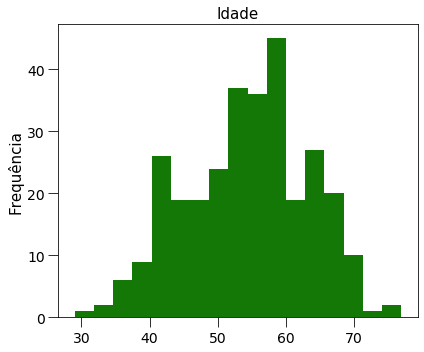

In [67]:
#Construção do histograma da variável idade
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(6,5))
bin_edges = np.histogram(df_uci)
fig.subplots_adjust(hspace=2, wspace=0.5)
var = df_uci['age']
axs.hist(var, bins=17, color='#147807') #axs[0,0] o será inseri na primeira linha, e o segundo número indica a que será o primeiro gráfico. 
axs.set_title('Idade', size=15)
axs.set_ylabel('Frequência', size=15)
axs.tick_params(length=10, labelsize=14)

##Resultado
Conforme observado na tabela estatística, a média de idade dos pacientes é de 54 anos. Além disso é possível identificar que o paciente mais jovem possui 29 anos e o de maior idade com 77 anos. O histograma mostra qual a distribuição das idades e qual o intervalo com maior frequência. A maioria dos pacientes possuem entre 40 e 70 anos de idade. Entretanto, o intervalo com maior frequência compreende dos 50 aos 60 anos.  

###Próximo passo será analisar as variáveis colesterol total (`chol`), pressão arterial sistólica em repouso (`trestbps`) e frequência cardíaca máxima alcançada (`thalach`). 
Sabendo da faixa etária dos paciente, vamos entender um pouco mais sobre alguns parâmetros fisiológicos.

Vamos analisar a distribuição e frequência dos dados dentro do intervalo de cada variável. E a variação destes dados e possível presença de outliers (ou valores discrepantes). 

Para isso serão realizadas as seguintes análies. 
* Histograma para analisar a distribuição e frequência dos dados
* Boxplot para verificar a variação dos dados e presença de outliers

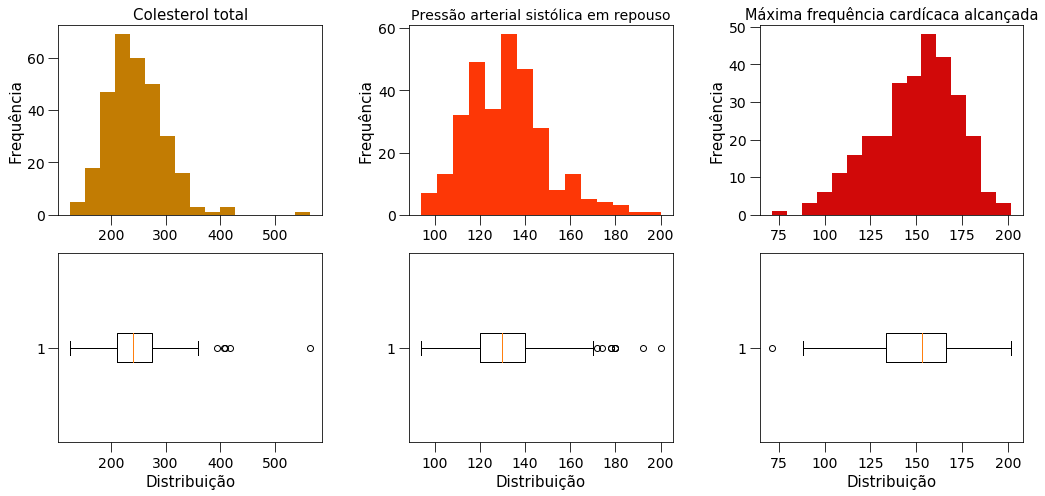

In [68]:
fig, axs = plt.subplots(2, 3, sharey=False, tight_layout=True, figsize=(15,7))
bin_edges = np.histogram(df_uci)
fig.subplots_adjust(hspace=2, wspace=0.5)


var1 = df_uci['chol'] #Variável colesterol
var2 = df_uci['trestbps'] #Pressão sanguínea em repouso
var3 = df_uci['thalach'] #Variável Máxima frequência cardíaca alcançada

#axs[0,0] O primeiro número indica a linha a qual este gráfico será localizado.
#O segundo número inidica a posição que este gráfico irá ocupado na linha.
#Lembrando que 0 sempre representa a primeira posição. 

axs[0,0].hist(var1, bins=16, color='#C27C03') #axs[0,0] o será inseri na primeira linha, e o segundo número indica a que será o primeiro gráfico. 
axs[0,0].set_title('Colesterol total', size=15)
axs[0,0].set_ylabel('Frequência', size=15)
axs[0,0].tick_params(length=10, labelsize=14)

axs[0,1].hist(var2, bins=15, color='#FD3706') #axs[0,1] significa que está na primeira linha (primeiro 0) e será o segundo gráfico (número 1)
axs[0,1].set_title('Pressão arterial sistólica em repouso', size=14)
axs[0,1].set_ylabel('Frequência', size=15)
axs[0,1].tick_params(length=10, labelsize=14)

axs[0,2].hist(var3, bins=16, color='#D10909') #axs[0,2] significa que está na primeira linha (primeiro 0) e será o terceiro gráfico (número 2)
axs[0,2].set_title('Máxima frequência cardícaca alcançada', size=14.5)
axs[0,2].set_ylabel('Frequência', size=15)
axs[0,2].tick_params(length=10, labelsize=14)

axs[1,0].boxplot(var1, vert=False) #axs[1,1] significa que está na segunda linha (número 1) e será o primeiro gráfico (número 0)
axs[1,0].set_xlabel('Distribuição', size=15)
axs[1,0].tick_params(length=10, labelsize=14)


axs[1,1].boxplot(var2, vert=False) #axs[1,1] significa que está na segunda linha (número 1) e será o segundo gráfico (número 1)
axs[1,1].set_xlabel('Distribuição', size=15)
axs[1,1].tick_params(length=10, labelsize=14)

axs[1,2].boxplot(var3, vert=False) #axs[1,2] significa que está na segunda linha (número 1) e será o terceiro gráfico (número 2)
axs[1,2].set_xlabel('Distribuição', size=15)
axs[1,2].tick_params(length=10, labelsize=14)

plt.show();


###Resultado
Os gráficos estão organizados aos pares. Assim,  cada variável possui dois gráficos. O gráfico superior representa é o histograma e o inferior o boxplot. 

Começando pelo colesterol total, observa-se que uma pequena parcela apresenta o nível de colesterol abaixo de 200. Grande parte dos pacientes apresentam níveis de colesterol entre 200 e 300. Entretano, existem pacintes apontados como outliers com valores acima de 300. 

Seguindo a característica dos dados referentes ao colesterol, a pressão arterial sistólica em repouso também apresenta uma grande variação dos dos valores. Uma parcela considerável apresenta uma pressão sanguínea acima de 120. E alguns casos os valores ficaram acima de 160.

A máxima frequência cardíaca após realização de execício, também apresentou uma grande variação. Grande parte dos pacientes se concentraram entre o intervalo de 125 e 175 batimentos por minuto. 

Note o boxplot apoutou presença de outliers nas três variáveis analisadas. Uma prática comum é a retirada dos outliers. Entretanto, eles serão mantidos para análises seguintes. Isso porquê este é um teste clínico onde um conjunto de variáveis foram analisadas no mesmo paciente. Assim, pode existir uma relação entre esses dados discrepantes nos resultados dos exames.

##Exploração dos dados.
Como observamos acima, os examos dos pacientes que participaram do ensio clínnico apresentavam uma grande variação. Para uma melhor compreensão vamos agrupar os dados dentro de categorias.

Esse passo será executado para os dados referentes ao colesterol total e à pressão arterial sistólica. Esses dados estão com valores absolutos obtidos nos exames. Isso dificulta a comparação entre os pacientes. Por isso os dados serão distribuídos em categorias que compreendem um determinado intervalo. Os dados serão categorizados de acordo com a Diretriz de Prevenção Cardiovascular da Sociedade Brasileira de Cardiologia - 2019. 

###Categorização dos dados referentes ao colesterol total
Os dados serão agrupados de acordo com o Quadro 1.7 da Diretriz de Prevenção Cardiovascular da Sociedade Brasileira de Cardiologia - 2019. **Este agrupamento não tem relação com a pontuação atribuída no quadro. Os valores são apenas classificatórios.**

Assim os dados serão dividos em 5 categorias da seguinte forma:

* Menor que 160 = 0
* De 160 a  199 = 1
* De 200 a 239 = 2
* De 240 a 279 = 3
* Acima de 279 = 4


In [0]:
#Cria uma cópia do dataframe original. Medida de segurança para preservação dos dados originais.
df_categ = df_uci.copy()

In [0]:
#Cria as categorias e distribui os valores referentes à coluna com dados de colesterol 
#dentro de uma das 5 categorias.
coluna = df_categ['chol']
transf  = []
for i in coluna:
    if i <= 160:
      i = 0
      transf.append(i)
    elif i <= 199:
      i = 1
      transf.append(i)
    elif i <= 239:
      i = 2
      transf.append(i)
    elif i <= 279:
      i = 3
      transf.append(i)
    elif i > 279:
      i = 4
      transf.append(i)

In [0]:
#Inclui a nova coluna com os dados de colestrol categorizados no dataframe com o nome chol_categ 
df_categ['chol_categ'] = transf

##Categorização dos dados referentes à pressão arterial sistólica.
Seguindo a mesma lógico dos dados referentes ao coleterol total. Vamos distribuir os valores da pressão arterial sistólica em categorias. Os valores serão agrupados seguindo o Quadro 1.7 da Diretriz de Prevenção Cardiovascular da Sociedade Brasileira de Cardiologia - 2019. **Este agrupamento não tem relação com a pontuação atribuída no quadro. Os números são apenas classificatórios.**

Os dados foram distribuídos dentro de 5 categorias da seguinte forma:

* Menor ou igual 120 = 0
* De 121 a  129 = 1
* De 130 a 139 = 2
* De 140 a 159 = 3
* Acima de 160 = 4




In [0]:
#Transforma os valores referentes à coluna com dados de pressão arterial sistólica 
coluna_2 = df_categ['trestbps']
transf_2  = []
for i in coluna_2:
    if i <= 120:
      i = 0
      transf_2.append(i)
    elif i <= 129:
      i = 1
      transf_2.append(i)
    elif i <= 139:
      i = 2
      transf_2.append(i)
    elif i <= 159:
      i = 3
      transf_2.append(i)
    elif i > 159:
      i = 4
      transf_2.append(i)

In [0]:
#Inclui a coluna com dados categorizados no dataframe com o nome trestbps_categ
df_categ['trestbps_categ'] = transf_2

In [74]:
#Checar se a coluna foi inserida corretamente
df_categ.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol_categ,trestbps_categ
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,2,3
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,4,4
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,2,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,3,2
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,2,2


Note que algumas colunas apresentam números decimais, quando na verdade são números inteiros. Para converter os números com casas decimais `float` em números inteiros `int`, será utilizado o método `astype()`.

In [0]:
df_categ['age'] = df_categ['age'].astype(int)
df_categ['sex'] = df_categ['sex'].astype(int)
df_categ['cp'] = df_categ['cp'].astype(int)
df_categ['trestbps'] = df_categ['trestbps'].astype(int)
df_categ['chol'] = df_categ['chol'].astype(int)
df_categ['fbs'] = df_categ['fbs'].astype(int)
df_categ['restecg'] = df_categ['restecg'].astype(int)
df_categ['thalach'] = df_categ['thalach'].astype(int)
df_categ['exang'] = df_categ['exang'].astype(int)
df_categ['slope'] = df_categ['slope'].astype(int)
df_categ['ca'] = df_categ['ca'].astype(int)
df_categ['thal'] = df_categ['thal'].astype(int)

In [76]:
#Conferir se a alteração ocorreu em todas as colunas especificadas acima.
df_categ.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol_categ,trestbps_categ
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,2,3
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,4,4
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,3,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,2,2


In [0]:
#Produz uma cópia do dataframe. Este é um procedimento de sugrança.
selected_df = df_categ.copy()

##Agrupamento dos dados. 
Após categorizados, os dados serão agrupado de acordo com os resultados dos exames. Esse agrupamento será feito de forma condicional, ou seja, pacientes só serão inseridos no mesmo grupo se apresentarem resultados iguais. Para isso será utilizada a função `groupby`.
Serão utilizadas as seguintes colunas:
* trestbps_categ = pressão arterial sitólica em repouso (categorizada)
* chol_categ = colesterol total categorizado
* fbs = glicemia (se abaixo de 120 = 0, se acima de 120 = 1)
* num = num - diagnóstico de doença cardíaca (diagnóstico angiográfico)
 0 = não há doença cardíaca ( < 50% de estreitamento do diâmetro)
 1 = há doença cardíaca ( > 50% de estreitamento do diâmetro)

Os pacientes serão agrupados primeiramente pela pressão aterial sistólica em repouso. A partir desse agrupamento, serão realizados subagrupamentos com os dados de colestrol, em seguida glicemia e por último serão os pacientes com e sem doenças cardíacas.

Após o agrupamento será feita a contagem de quantos pacientes se encaixam dentro de cada condição. Esses valores estão representados na coluna **'contagem'**. 

Além disso, será calculada a porcentagem das ocorrências dentro de todo o conjunto de dados. 



In [0]:
#Agrupamento dos dados
grouped_df = pd.DataFrame(selected_df.groupby(['trestbps_categ', 'chol_categ', 'fbs', 'num'], as_index=False).size())
grouped_df.columns = ['contagem']

In [0]:
grouped_df.reset_index(inplace=True);

In [0]:
#Cálculo de porcentagem
grouped_df['porcentagem'] = (grouped_df['contagem'] / grouped_df['contagem'].sum() * 100)

Após o agrupamento e o cálculo de porcentagem temos a seguinte configuração da tabela.  
* Primeira coluna = Pressão arterial sistólica (cateogia de 0 a 4). Onde valores: 
  * Menor ou igual 120 = 0
  * De 121 a  129 = 1
  * De 130 a 139 = 2
  * De 140 a 159 = 3
  * Acima de 160 = 4

* Segunda coluna = Colesterol total (categoria de 0 a 4). Onde valores:
  * Menor que 160 = 0
  * De 160 a  199 = 1
  * De 200 a 239 = 2
  * De 240 a 279 = 3
  * Acima de 279 = 4

* Terceira coluna = Glicemia abaixo ou acima de 120 (0 ou 1). Onde valores:
  * Abaixo de 120 = 0
  * Acima de 120 = 1
* Quarta coluna = Presença ausência de doença cardíaca (0 ou 1).
  * Não há diagnóstico doença cardíaca = 0
  *Diagnóstico positivo para doença cardíaca = 1

##Interpretando a tabela 
Assim, ao lermos os a sequência numérica `(0, 0, 0, 0)` interpretamos da seguinte forma: 
<p> Os pacientes deste grupo apresentam pressão arterial sistólica abaixo de 120 (primeiro número = 0), colesterol total abaixo de 160 (segundo número = 0), glicemia abaixo de 120 (terceiro número = 0) e não há presença de doença cardíaca (quarto número = 0). </p>

Enquanto que pacientes do grupo `(0, 0, 0, 1)` apresentam pressão arterial sistólica abaixo de 120 (primeiro = 0), colesterol total abaixo de 160 (segundo = 0), glicemia abaixo de 120 (terceiro = 0) e **presença** de doença cardíaca coronariana (quarto número = 1). 
<p> E assim sucessivamente. <p/>

In [81]:
grouped_df.head()

,trestbps_categ,chol_categ,fbs,num,contagem,porcentagem
0,0,0,0,0,4,1.320132
1,0,0,0,1,1,0.330033
2,0,1,0,0,7,2.310231
3,0,1,0,1,8,2.640264
4,0,1,1,0,2,0.660066


#Preparo para representação dos dados em gráfico.
Para que consigamos produzir gráficos seguindo a mesma lógica de interpretação apresentada anteriormente, vamos criar um DataFrame denominado **final_group**. Serão realizados os seguintes passos: 
* Criar um DataFrame denominado group_2. 
* Fazer a fusão do DataFrame recém criado **group_2** com DataFrame já existente **grouped_df**.
* Para isso será utilizado o método `merge()`.
 
 Porque realizar todo esse processo? Isso permite trabalhar tanto os dados agrupados, quanto com as colunas individualmente. Garantindo uma flexibilidade na visualização dos dados. 

In [0]:
#Cria o DataFrame group_2 e renomea a nova coluna como 'contagem'
group_2 = pd.DataFrame(selected_df.groupby(['trestbps_categ', 'chol_categ', 'fbs', 'num']).size()) 
group_2.columns = ['contagem']

In [0]:
#Faz a fusão utilizando o método merge() e inclui o índice do group_2 como coluna.
final_group = pd.merge(grouped_df, group_2, how='left', on=[group_2.index])

In [84]:
#Vizualiza se os procedimentos foram realizados corretamente
final_group.head()

,key_0,trestbps_categ,chol_categ,fbs,num,contagem_x,porcentagem,contagem_y
0,"(0, 0, 0, 0)",0,0,0,0,4,1.320132,4
1,"(0, 0, 0, 1)",0,0,0,1,1,0.330033,1
2,"(0, 1, 0, 0)",0,1,0,0,7,2.310231,7
3,"(0, 1, 0, 1)",0,1,0,1,8,2.640264,8
4,"(0, 1, 1, 0)",0,1,1,0,2,0.660066,2


Notem que o novo DataFrame possui duas colunas denominadas contagem. Isso porquê elas existiam em ambos DataFrame. Dessa forma, vamos remover a coluna '**contagem_y**'. Para isso será utilzido o método `drop()`.

In [0]:
#Remove a coluna
final_group.drop(columns=['contagem_y'], inplace=True)

###Atribuindo legendas
Vamos inserir uma coluna denominada **diagnostico** onde pacientes que apresentam doença cardíaca coronariana será atribuído **positivo** e pacientes que não apresentam essa condição será atribuído **negativo**.


**Observação:**Note que A palavra diagnóstico foi inserida sem acento agudo para evitar erros de interpretação da linguagem de programação.


In [0]:
#Atribui valores positivo e negativo para pacientes com presença ou ausência de doença coronariana cardíaca.
diagnostico = []
for i in final_group['num']:
  if i == 0:
    i = 'negativo'
    diagnostico.append(i)
  if i == 1:
    i = 'positivo'
    diagnostico.append(i)

In [0]:
#Inclui a coluna com dados categorizados no dataframe com o nome diagnostico
final_group['diagnostico'] = diagnostico

In [0]:
final_group.rename(columns={'key_0': 'grupos', 'contagem_x': 'contagem'}, inplace=True)

In [89]:
final_group.head()

,grupos,trestbps_categ,chol_categ,fbs,num,contagem,porcentagem,diagnostico
0,"(0, 0, 0, 0)",0,0,0,0,4,1.320132,negativo
1,"(0, 0, 0, 1)",0,0,0,1,1,0.330033,positivo
2,"(0, 1, 0, 0)",0,1,0,0,7,2.310231,negativo
3,"(0, 1, 0, 1)",0,1,0,1,8,2.640264,positivo
4,"(0, 1, 1, 0)",0,1,1,0,2,0.660066,negativo


## Visualização dos resultados. 
Para visualizar os dados presentes na tabela, será contruído um gráfico de barras comparando a distrubuição dos dados de acordo com o agrupamento. Para isso será utilizado a coluna porcentagem. 


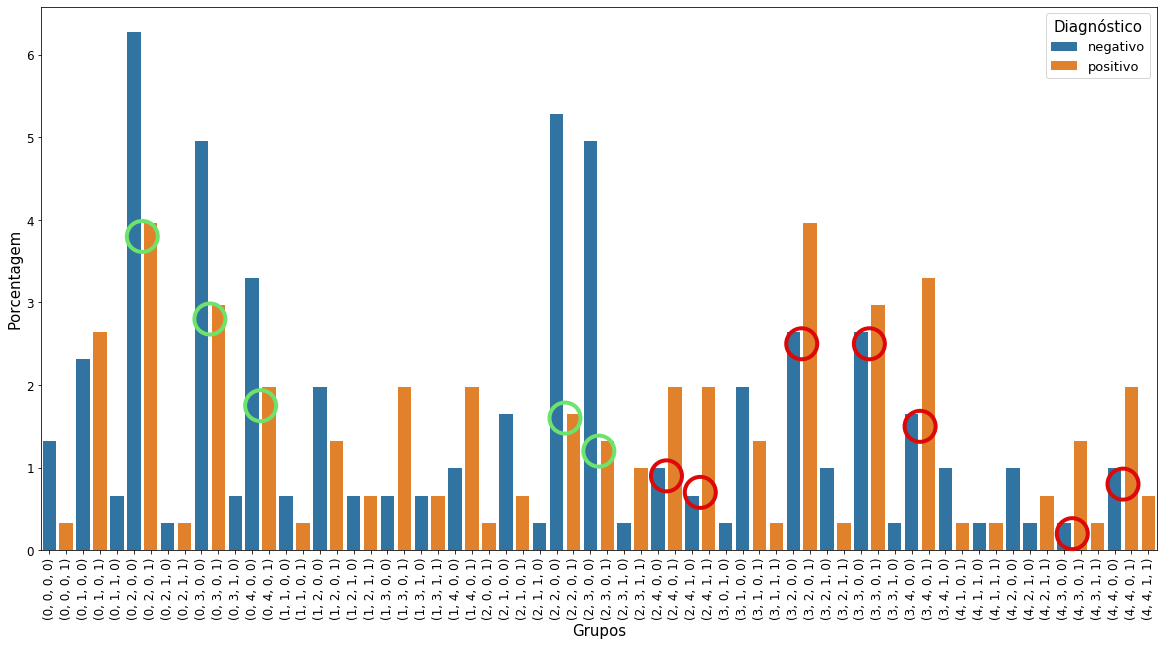

In [90]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x='grupos', y='porcentagem', hue='diagnostico', data=final_group, dodge=False)
ax.set_xticklabels(final_group.grupos, rotation=90, size=12)
ax.set_xlabel('Grupos', fontsize=15)
ax.set_ylabel('Porcentagem', fontsize=15)
ax.tick_params(axis='both', labelsize=12)
plt.legend(title='Diagnóstico',title_fontsize=15, loc='upper right', fontsize= 13)

bbox_props = dict(boxstyle="circle", fc='none', ec='#6CE46C', lw=4) #estilo dos marcadores no gráfico, círculos 
plt.text(5.5, 3.8, s=' ', ha="center", va='center', size=20, bbox=bbox_props) # ooordenadas dos círculos no gráfico

bbox_props = dict(boxstyle="circle", fc='none', ec='#6CE46C', lw=4)
plt.text(9.5, 2.80, s=' ', ha="center", va='center', size=20, bbox=bbox_props)

bbox_props = dict(boxstyle="circle", fc='none', ec='#6CE46C', lw=4)
plt.text(12.5, 1.75, s=' ', ha="center", va='center', size=20, bbox=bbox_props)

bbox_props = dict(boxstyle="circle", fc='none', ec='#6CE46C', lw=4)
plt.text(30.5, 1.6, s=' ', ha="center", va='center', size=20, bbox=bbox_props)

bbox_props = dict(boxstyle="circle", fc='none', ec='#6CE46C', lw=4)
plt.text(32.5, 1.2, s=' ', ha="center", va='center', size=20, bbox=bbox_props)

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(36.5, 0.9, s=' ', ha="center", va='center', size=20, bbox=bbox_props)

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(38.5, 0.7, s=' ', ha="center", va='center', size=20, bbox=bbox_props);

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(44.5, 2.5, s=' ', ha="center", va='center', size=20, bbox=bbox_props);

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(48.5, 2.5, s=' ', ha="center", va='center', size=20, bbox=bbox_props);

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(51.5, 1.5, s=' ', ha="center", va='center', size=20, bbox=bbox_props);

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(60.5, 0.2, s=' ', ha="center", va='center', size=20, bbox=bbox_props);

bbox_props = dict(boxstyle="circle", fc='none', ec='#DD0808', lw=4)
plt.text(63.5, 0.8, s=' ', ha="center", va='center', size=20, bbox=bbox_props);


##Resultados 

No gráfico acima, pacientes que <b>não</b> apresentam doença cardíaca coronariana estão representados pelas barras azuis. Enquato pacientes que apresentam doença cárdíaca coronariana estão representados pelas barras laranjas. A leitura do eixo denominado grupos segue a mesma lógica da tabela anterior. 
&nbsp;

Após o processo de estruturação dos dados e construção do gráfico, é possível perceber algumas características importantes no grupo de pacientes. O gráfico apresenta circulos verdes e vermelhos, que são alguns pontos que merecem destaque. O círculos estão posicionados sobre grupos de pacientes que apresentam resultados de exames semelhantes. Entretanto o disgnóstico foi positivo para um grupo e negativo para outro grupo. Destacando a relação entre pacientes com diagnóstico negativo (barra azul) com aqueles com diagnóstico positivo (laranja) para doença cardíaca coronariana.
&nbsp;

Os círculos verdes estão posicionado sobre os grupos onde, a porcentagem de pessoas com resultados de exames semelhantes e que não apresentaram doença cardíaca foi nítidamente maior que aquelas diagnosticadas com doença cardíaca coronariana. Os círculos vermelhos representam pontos onde ocorreu a inversão desse padrão, tornando-se mais recorrente à medida que os resultados dos exames foram apresentando o quadro clínico dos pacientes era mais graves, fato este perfeitamente compreensível.

Aqui foram utilizadas apenas 3 variáveis mais o diagnóstico (positivo ou negativo). Fato que utilizando um número maior de variáveis seja possível alcançar um nível maior de detalhamento. Esse é exatamento o trabalho dos algoritmos de inteligência artificial.



#**Conclusão**
A análise exploratória dos dos dados permitiu ter uma melhor visualização das características dos  dados utilizados neste teste clínico. Foi possível constatar que a média de idade dos pacientes foi de 54 anos, mas a maior parte dos pacientes apresentaram idade acima de 40 anos. Além disso, analisando os níveis de colesterol total e pressão arterial sistólia, foi possível observar que grande parte dos pacientes apresentaram resultados acima do recomendado (baseado nos parâmetros da Diretriz de Prevenção Cardiovascular da Sociedade Brasileira de Cardiologia). 

O agrupamento dos dados permitiu visualizar que utilizar poucas variáveis pode não ser o suficiente para ter uma precisão satisfatória no resultado.

Isso mostra a importancia não só da análise exploratória, mas a própria construção de um banco de dados que permita a unidades de saúde entender as características de seus pacientes e da população como um todo. Fornecendo às instituição de saúde uma ferramenta que proporcione um ganho na eficiência e precisão de diagnósticos. 

####**Referência**

Detrano R, Janosi A, Steinbrunn W, Pfisterer M, Schmid JJ, Sandhu S, Guppy K H, Lee S, Froelicher V. International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, vol 64, 5, 1989, 304-310.

Précoma DB, Oliveira GMM, Simão AF, Dutra OP, Coelho OR, Izar MCO, et al. Atualização da Diretriz de Prevenção Cardiovascular da Sociedade Brasileira de Cardiologia – 2019. Arq Bras Cardiol. 2019; 113(4):787-891
